1. sklearn.Linear_model.SGDRegressor(loss=“squared_loss”, ...)를 사용해서, 
5개 특성 중 4개를 인풋으로 하고, 
1개 특성을 타겟으로 선택해 연속형 데이터를 예측하는 SGD 회귀분석 모델을 훈련시키고 시각화해 보세요. 
loss를 제외한 모든 패러미터는 SGDClassifier와 동일합니다. 

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fish = pd.read_csv('https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fish.csv')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [3]:
# input = 'Weight','Length','Diagonal','Height'
# output = 'Width'
fish_input = fish[['Weight','Length','Diagonal','Height']].to_numpy()
fish_target = fish['Width'].to_numpy()

In [4]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [10]:
# 과적합을 보임
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9105248841603444
0.9377522004323394


In [11]:
# 최적의 모델은 중회귀
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9724001979374758
0.9607861311046508


In [23]:
# 정규화
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [24]:
lr = LinearRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9724001979374759
0.9607861311068912


In [16]:
from sklearn.linear_model import SGDRegressor

In [25]:
# squared_loss 사용
# 회귀일때 사용하는 손실 함수임.
# 과적합이 확인됐습니다.

sc = SGDRegressor(loss='squared_error',max_iter=10 ,random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8018622021974446
0.8738759592334677


c:\ProgramData\anaconda3\envs\ML\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [26]:
# 추가적인 학습을 수행합니다.
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8149515637097503
0.8774700230984411


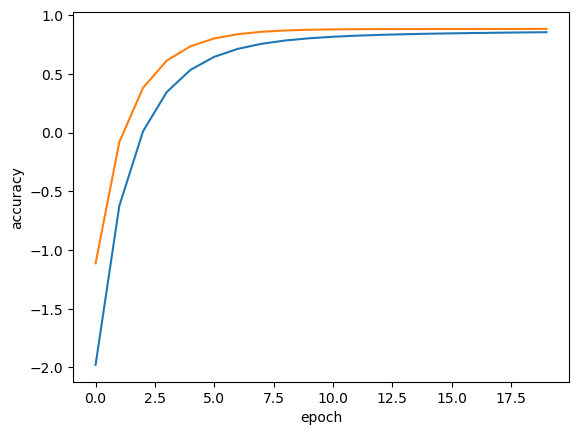

In [27]:
#최적의 에포크값을 찾아냅니다.
# test 그래프를 보고 train과의 차이를 확인합니다.

sc =  SGDRegressor(loss='squared_error', random_state=42)

train_score = []
test_score = []

for _ in range(0,20):
    sc.partial_fit(train_scaled, train_target)

    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [28]:
max(test_score)

0.882211663805442

In [29]:
#최적의 에포크 값은 19입니다.
test_score.index(max(test_score))

19

In [33]:
sc = SGDRegressor(loss='squared_error',max_iter=19,tol=None ,random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8535204968747454
0.8804591910409331


In [ ]:
# 에포크값을 늘려도 과소적합이 해결되지 않을때, poly를사용.
# standard는 항상 poly를 먼저 하고 난뒤에 standard를 사용함.